**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (10 points) 

Rewrite the following code into functional form using lambdas, map, filter and reduce.

In [4]:
n = 10
s = 10
for i in range(n):
    if i % 2:
        s = s| i**2
s

123

In [5]:
from functools import reduce

In [31]:
reduce(lambda x, y: x | y, list(filter(lambda x:x % 2,list(map(lambda x:x**2, range(10))))),10)

123

**2**. (10 points)

Rewrite the code above as a `toolz` pipeline, using lambdas and curried or partially applied functions as necessary.

#### Method 1

In [24]:
import toolz as tz
import toolz.curried as c

res=tz.pipe(
    range(10),
    c.map(lambda x: x**2),
    c.filter(lambda x: x % 2),
    c.reduce(lambda x, y: x | y ),
    lambda x: x|10
)

In [8]:
res

123

#### Method 2

In [29]:
res2=tz.pipe(
    range(10),
    c.map(lambda x: x**2),
    c.filter(lambda x: x % 2),
    list,
    lambda x: x+[10],
    c.reduce(lambda x, y: x | y )
)

In [30]:
res2

123

**3**. (10 points) 

Repeat the Buffon's needle simulation from Lab01 as a function that takes the number of needels `n` as input and returns the estimate of $\pi$. The function should use `numpy` and vectorization.  What is $\pi$ for 1 million needles?

In [11]:
import random 
from numpy import pi, sin

def buffon(L, D, N):
    """ function to simulate the buffon's needle experiment
        L is the length of the needle, 
        D is the difference between two lines
        N is the number of times to drop the needle
    """
    count= 0; 
    for loop in range(N) :
        theta = pi*random.uniform(0,180)/180
        if L * sin(theta) > random.uniform(0,D): 
            count += 1
    est=count/N
    Pi_est = (2*L) / (est*D)
    return Pi_est

In [12]:
L = 1
D = 4
N = int(1e6) 
buffon(L, D, N)

3.140072347266881

**4**. (20 points) 

Simpsons rule is given by the follwoing approximation

![Simpsons](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0cdf0804bb8810e4438cbea898dc7a2fedb3e57)

- Write Simpsons rule as a function `simpsons(f, a, b, n=100)` where n is the number of equally spaced intervals from `a` to `b`.  (10 points)
- Use this function to estimate the probability mass of the standard normal distribution between -1 and 1. Implement the PDF of the standard normal distribution $\psi(x)$ as a function. (10 points)

$$
\psi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$

In [13]:
import numpy as np

In [14]:
def normal(x):
    """ function to get the pdf of a normal distribution
    """
    res=(1/np.sqrt(2*np.pi))*np.exp(-0.5*(x**2))
    return(res)

In [15]:
def simpsons(f,a,b,n=100):
    """ function for the using of simpsons methods to estimate the intergation values
    """
    h=(b-a)
    x=np.arange(a, b, h/n)
    temp=f(x[0])+f(x[n-1])
    even=0
    odd=0
    N=len(x)
    for i in range(1,N):
        if i % 2==0:
            even=even+2*f(x[i])
        else:
            odd=odd+4*f(x[i])
    res=(temp+even+odd)*h/(3*N)
    return(res)

In [16]:
simpsons(normal,-1,1,n=100)

0.6827217514378684

**5**. (50 points)

Write code to generate a plot similar to the following 

![automata](./automata1d.png)

using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def make_plots(rules, niter,ncols):
    """Function to generate of 1D Cellular Automata;
       type in the rules, a list of number from 0 to 255;
       niter is the number of iteration
       ncols is the number of columns in the plot
    """
    nrows=int(len(rules)/ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 18))
    rule=np.array([1,1,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0]).reshape((8,3))
   
    rules_new=np.array(rules).reshape((nrows,ncols))
    for rows in range(nrows):
        for cols in range(ncols):
            r=rules_new[rows][cols]
            binary=list(np.binary_repr(r,width=8))
            binary = list(map(int, binary))
            def next_line(start):
                """Function to generate of 1D Cellular Automata;
                   Can get the numbers of each cell;
                   start determines the number of iterations. 
                """
                res=[]
                res.append(np.array([start[2*niter-2],start[0],start[1]]))
                for i in range(2*niter-3):
                    res.append(start[(i):(i+3)])
                res.append(np.array([start[2*niter-3],start[2*niter-2],start[0]]))
                point=[]
                for i in range(2*niter-1):
                    temp=res[i]
                    temp2= temp==rule
                    num=np.where(np.sum(temp2,axis=1)==3)[0][0]
                    point.append(binary[num])
                return(point)
            xs=np.zeros((niter,(2*niter-1)))
            xs[0,niter-1]=1
            start=xs[0,]
            res=list(start)
            temp=start
            for i in range(niter-1):
                temp=next_line(temp)
                res=res+temp
            xs=np.array(res).reshape((niter,(2*niter-1)))
            
            name='Rule ' + str(r)

            axes[rows][cols].imshow(xs, cmap='Greys', interpolation='nearest')
            axes[rows][cols].set_title(name,fontsize=12)
            axes[rows][cols].set_xticks(np.arange(-0.5, (2*niter-1.5), 1));
            axes[rows][cols].set_yticks(np.arange(-0.5, (niter-0.5), 1));
            axes[rows][cols].set_xticks(np.arange(-.5, (2*niter-1.5), 1), minor=True);
            axes[rows][cols].set_yticks(np.arange(-.5, (niter-0.5), 1), minor=True);
            axes[rows][cols].grid(which='minor', color='black', linestyle='-', linewidth=0.3)
            axes[rows][cols].set_xticks([])
            axes[rows][cols].set_yticks([])
            pass

In [40]:
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]

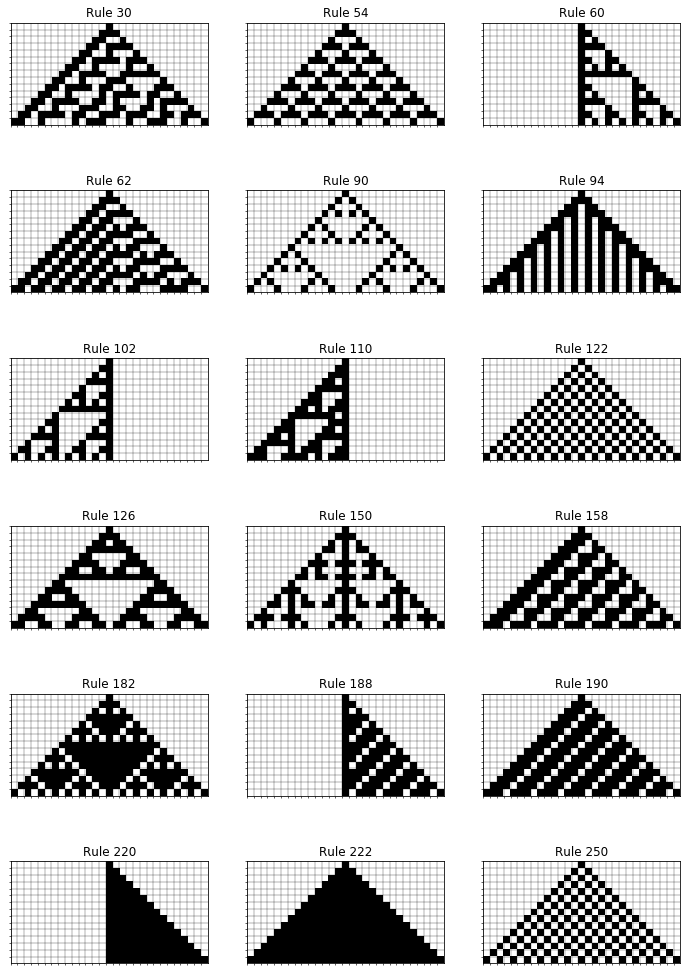

In [58]:
make_plots(rules,15,3) # iterate for 15 times

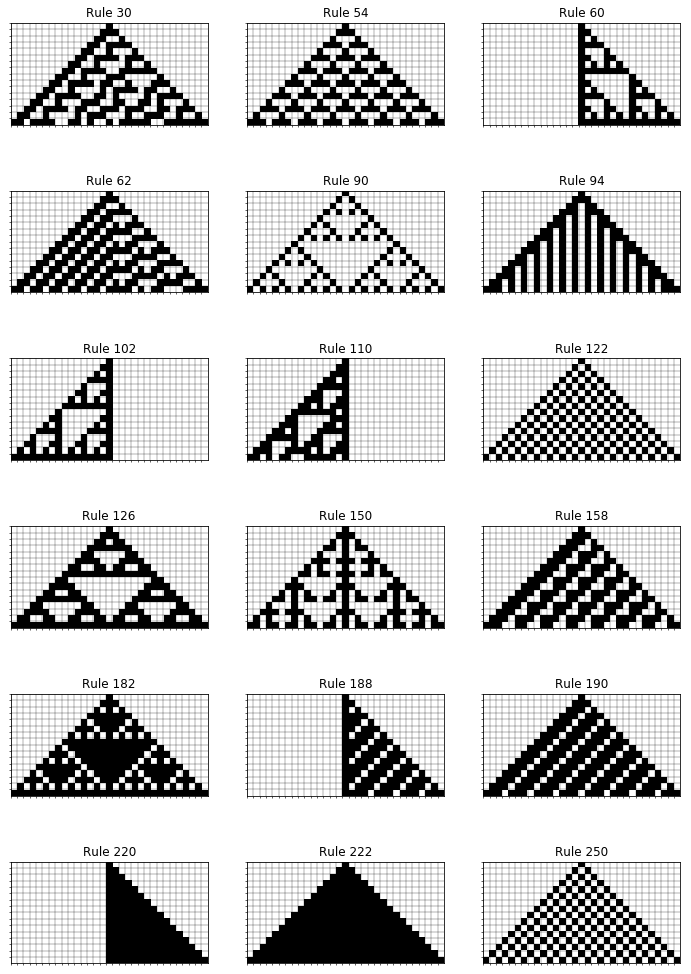

In [57]:
make_plots(rules,16,3) # iterate for 16 times

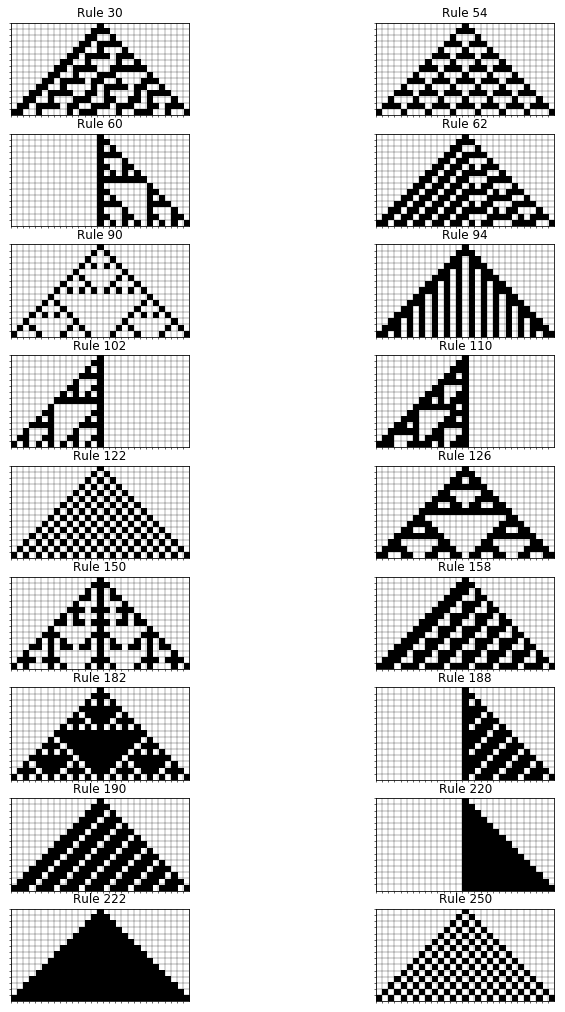

In [63]:
make_plots(rules,15,2) # iterate for 15 times

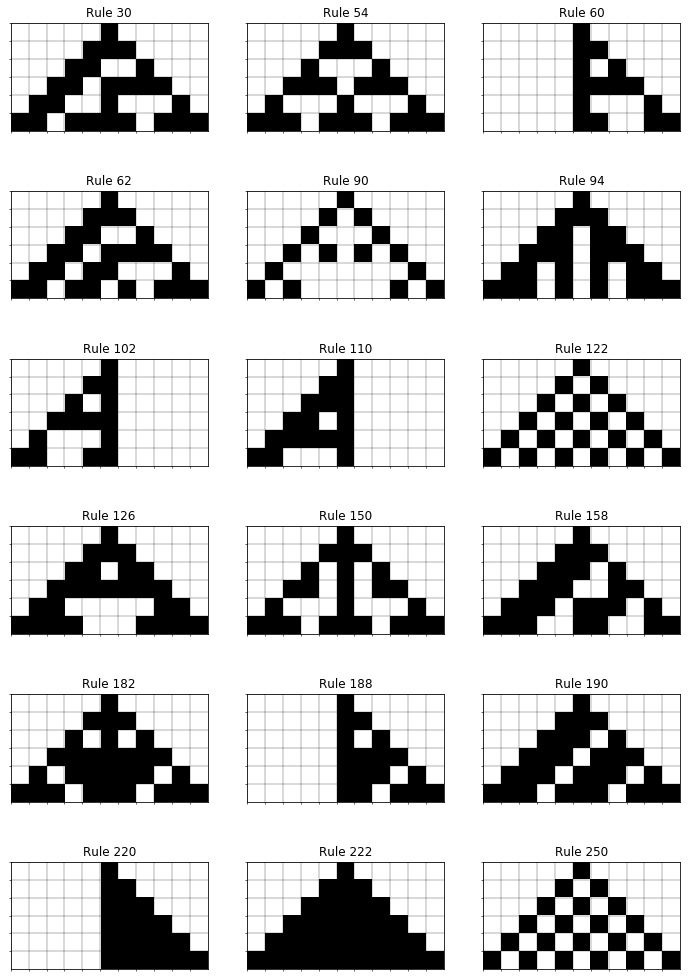

In [54]:
make_plots(rules, 6,3) # iterate for 6 times

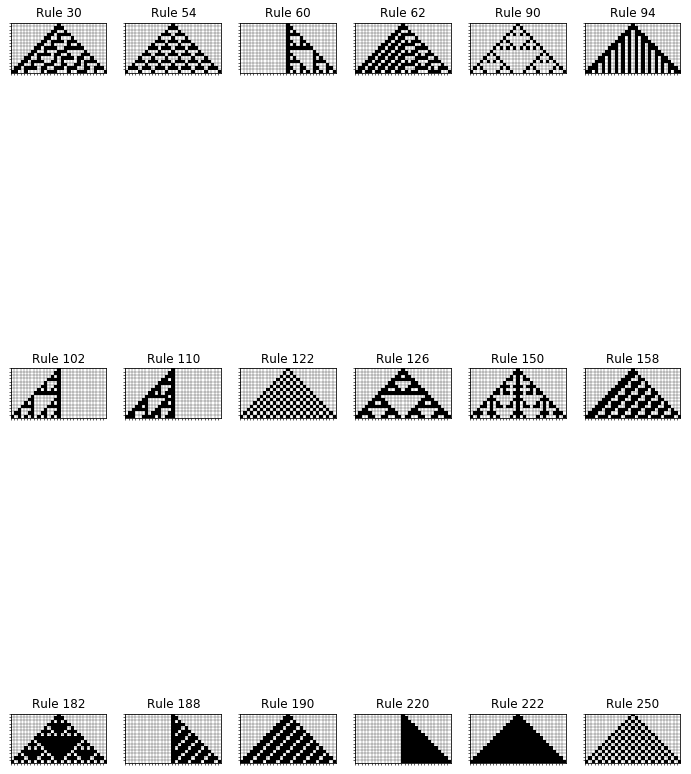

In [67]:
make_plots(rules,15,6) # iterate for 15 times